In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [ ]:
data = pd.read_csv("inventario.csv")

In [ ]:
data["Authors"]

0       López-Barrientos J.D.; Jiménez-Lizárraga M.; E...
1                                  Cui W.; Yang Y.; Di L.
2       Jauhari W.A.; Wangsa I.D.; Hishamuddin H.; Riz...
3                     Ben Elmir W.; Hemmak A.; Senouci B.
4                   Luo G.; Ezerman M.F.; Ling S.; Pan X.
                              ...                        
4995          van den Berg A.; Herings P.J.-J.; Peters H.
4996                              Shteren H.; Avrahami A.
4997    Álvarez-Rodríguez D.A.; Normey-Rico J.E.; Fles...
4998                 Perera S.; Janakiraman G.; Niu S.-C.
4999              Wu T.; Akartunali K.; Jans R.; Liang Z.
Name: Authors, Length: 5000, dtype: object

In [ ]:
import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup

from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

import string
import nltk
from nltk.corpus import stopwords

In [ ]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«"]    

punctuation += sp_punctuation

In [ ]:
data.keys()

Index(['Authors', 'Author full names', 'Author(s) ID', 'Titles', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'DOI', 'Cited by', 'Link', 'Abstract', 'Indexed Keywords',
       'Author Keywords', 'Document Type', 'Publication Stage', 'Open Access',
       'Source', 'EID'],
      dtype='object')

In [ ]:
titulos = str
for titulo in data["Author Keywords"]:
    titulos = str(titulo) + " " + str(titulos)
titulos

'Column generation; Cutting stock; Dantzig-Wolfe decomposition; Heuristics; Integer programming; Lot sizing (s, S) optimality; EOQ models; General ordering/procurement cost structures biomass; dead time; inventory control; model predictive control; renewable energy; supply chain E-commerce; Inventory errors; Inventory management; Supply chain; Value of information Dynamic pricing; Economic order decision; Inventory CIM; Framework; Implementation; Multiple case studies; SMEs agglomerative hierarchical clustering; case study; k-means clustering; package size; SOFM clustering Availability; Birth and death process; Inventory optimization; Repairable spares Inventory management; optimisation; supply chain Bi-level programming; Conditional value at risk; Green supply chain; KKT-conditions; Robust optimization Chance-constrained optimization; Cost/profit optimization; Geometric programming; Inventory management; Perfect duality Decision under uncertainty; Integrated water system; Mixed-intege

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
for p in punctuation:
    clean_texto = titulos.lower().replace(p,"")
    
for p in punctuation:
    clean_texto = clean_texto.replace(p,"")


In [ ]:
for stop in stop_words:
    clean_texto_list = clean_texto.split()
    clean_texto_list = [i.strip() for i in clean_texto_list]
    try:
        while stop in clean_texto_list: clean_texto_list.remove(stop)
    except:
        print("Error")
        pass
    clean_texto= " ".join(clean_texto_list)

In [ ]:
lista_texto = clean_texto.split(" ")

palabras = []

for palabra in lista_texto:
    if (len(palabra)>=3 and len(palabra)<18):
        palabras.append(palabra)

In [ ]:
word_count={}
for palabra in palabras:
    if palabra in word_count.keys():
        word_count[palabra][0]+=1
    else:
        word_count[palabra]=[1]
 

In [ ]:
df = pd.DataFrame.from_dict(word_count).transpose()
df.columns=["freq"]
df.sort_values(["freq"], ascending=False, inplace=True)
df.head(10)

,freq
inventory,3130
management,1364
supply,1127
chain,1027
control,692
demand,691
production,587
optimization,582
programming,516
system,413


In [ ]:
def plot_bar(data=df, top=5):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df.iloc[:top,:].index, height = df.iloc[:top,0].values)
    plt.show()

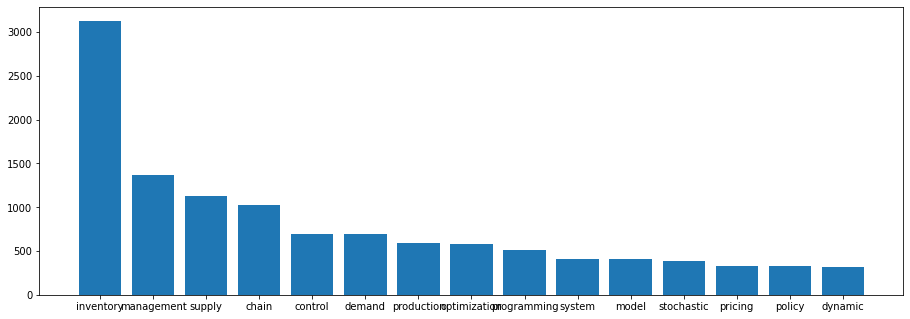

In [ ]:
plot_bar(data=df, top=15)

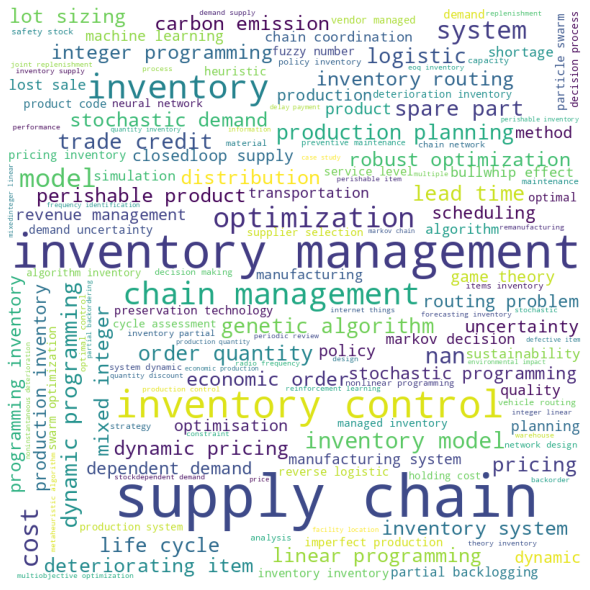

In [ ]:
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5, collocation_threshold=10).generate(clean_texto)

word_cloud.to_file("n1.png") #Guardamos la imagen generada

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
data.head()

,Authors,Author full names,Author(s) ID,Titles,Year,Source title,Volume,Issue,Art. No.,Page start,...,Cited by,Link,Abstract,Indexed Keywords,Author Keywords,Document Type,Publication Stage,Open Access,Source,EID
0,López-Barrientos J.D.; Jiménez-Lizárraga M.; E...,"López-Barrientos, José Daniel (56072214800); J...",56072214800; 56000849600; 54417142300,On the Discrete-Time Minimum Principle in Mult...,2023,Cybernetics and Systems,NaN,NaN,NaN,NaN,...,0,https://www.scopus.com/inward/record.uri?eid=2...,This paper presents a robust version of the di...,Digital control systems; Discrete time control...,Discrete-time systems; multiple-mode systems; ...,Article,Article in press,NaN,Scopus,2-s2.0-85148619945
1,Cui W.; Yang Y.; Di L.,"Cui, Weiwei (55569796900); Yang, Yiran (571941...",55569796900; 57194105819; 57221396970,Modeling and optimization for static-dynamic r...,2023,International Journal of Production Economics,257,NaN,108756,NaN,...,0,https://www.scopus.com/inward/record.uri?eid=2...,Additive manufacturing (AM) offers apparent ad...,Additives; Dynamic programming; Heuristic algo...,Additive manufacturing; Delivery route design;...,Article,Final,NaN,Scopus,2-s2.0-85145653221
2,Jauhari W.A.; Wangsa I.D.; Hishamuddin H.; Riz...,"Jauhari, Wakhid Ahmad (40761547000); Wangsa, I...",40761547000; 57193543947; 36835903800; 5724767...,A sustainable vendor-buyer inventory model wit...,2023,Cogent Business and Management,10,1,2158609,NaN,...,0,https://www.scopus.com/inward/record.uri?eid=2...,This paper aims to minimize the emissions in t...,NaN,carbon tax; government incentive; green techno...,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85145602790
3,Ben Elmir W.; Hemmak A.; Senouci B.,"Ben Elmir, Walid (58075133900); Hemmak, Allaou...",58075133900; 58074873900; 15077193600,Smart Platform for Data Blood Bank Management:...,2023,Information (Switzerland),14,1,31,NaN,...,0,https://www.scopus.com/inward/record.uri?eid=2...,Despite the efforts of the World Health Organi...,Balancing; Blood; Forecasting; Inventory contr...,blood bank management; blood supply chain; mac...,Article,Final,All Open Access; Gold Open Access; Green Open ...,Scopus,2-s2.0-85146720362
4,Luo G.; Ezerman M.F.; Ling S.; Pan X.,"Luo, Gaojun (57194227959); Ezerman, Martianus ...",57194227959; 36720412500; 57289336900; 5721146...,New Families of MDS Symbol-Pair Codes From Mat...,2023,IEEE Transactions on Information Theory,69,3,NaN,1567,...,0,https://www.scopus.com/inward/record.uri?eid=2...,"In emerging storage technologies, the outputs ...",Block codes; Inventory control; Reed-Solomon c...,Matrix-product code; maximum distance separabl...,Article,Final,NaN,Scopus,2-s2.0-85141569046
